# 输入数据处理

In [7]:
import random
import pandas as pd
from datetime import date, timedelta

# 定义数据范围
random.seed(121)
min_per_step = 10
days = 2
start_date = date(2023, 9, 3)  # 指定起始日期

scale = 10
od_cnt = 200  # 共生成多少种od
output = 'output2'
input = 'input'
data = 'data'

## 合并od_dis_table

In [ ]:
# import pandas as pd
#
# od_dis_table = pd.read_csv('data/od_dis_table.csv')
# od_merge_table = pd.read_csv('input/new_od_dis.csv')
# edge_to_charge = pd.read_csv(f'data/edge_to_charge.csv')
#
# # 使用条件进行标记
# df = pd.merge(od_dis_table,edge_to_charge,on=['edge_id'],how='left')
# df['if'] = 0
# condition = (~df['charge_node_id'].isna()) & (df['charge_node_distance'] <= 1000) & (df['充电车位数'] > 0)
# df.loc[condition,'if']=1
# df = df.drop(['charge_node_id','charge_node_distance','场站名称','充电车位数'],axis=1)
# # 合并列表
# od_merge_table = od_dis_table.groupby(['station_id_x', 'station_id_y']).agg(
#     {'edge_id': list, 'cumsumlength': list,'if':list}).reset_index()
# # od_merge_table.to_csv(f'{input}/od_merged_table.csv')
# # cumsumlength处理
# def calculate_differences(lst):
#     differences = [lst[i] - lst[i - 1] for i in range(1, len(lst))]
#     return [lst[0]] + differences
# od_merge_table['cumsumlength2'] = od_merge_table['cumsumlength']
# od_merge_table['cumsumlength'] = od_merge_table['cumsumlength'].apply(calculate_differences)
# od_merge_table.to_csv(f'{input}/new_od_dis.csv')
# df.to_csv(f'{input}/od_dis_table.csv')
# df

In [8]:
import random
from datetime import date, timedelta
import pandas as pd
import numpy as np

od_prob = pd.read_csv(f'{input}/OD_flow_20230116.csv')

od_prob['O'] = od_prob['O'].astype(int)
od_prob['D'] = od_prob['D'].astype(int)
od_prob = od_prob[od_prob["O"] != od_prob["D"]]

#od_prob = od_prob[od_prob['flow'] >= od_prob['flow'].quantile(0.5)].reset_index(drop=True)

od_prob['prob'] = od_prob['flow'] / od_prob['flow'].sum()

sampled_indices = np.random.choice(len(od_prob), od_cnt, p=od_prob['prob'])

od_prob = od_prob.loc[sampled_indices].groupby(['O', 'D'])['flow'].count().rename('count').reset_index()
od_prob['date'] = date(2023, 9, 3)
od3 = od_prob
od3

,O,D,count,date
0,44,458,1,2023-09-03
1,130,500,1,2023-09-03
2,156,644,1,2023-09-03
3,159,891,1,2023-09-03
4,164,247,1,2023-09-03
...,...,...,...,...
195,689,183,1,2023-09-03
196,726,187,1,2023-09-03
197,733,458,1,2023-09-03
198,753,406,1,2023-09-03


## 生成od_count

In [4]:
# import random
# from datetime import date, timedelta
# import pandas as pd
# import psutil
#
# # 假设您的概率列表是一个名为 o_prob 的 DataFrame，包含 "index" 和 "probability" 两列
# o_prob = pd.read_csv(f'{input}/O_prob.csv')
#
# # 重构 O_values
# O_values = random.choices(o_prob["station_id"], o_prob["prob"], k=od_cnt)
# # 重构 D_values
# D_values = random.choices(o_prob["station_id"], o_prob["prob"], k=od_cnt)
# # 重构 prob
# prob = random.choices(o_prob["prob"], k=od_cnt)
#
# # 创建 DataFrame
# od3 = pd.DataFrame({
#     "O": O_values,
#     "D": D_values,
# })
# od3 = od3[od3["O"] != od3["D"]]
# od3 = od3.groupby(["O", "D"]).size().reset_index(name="count")
# od3['date'] = date(2023, 9, 3)
#
# od3.to_csv(f'{input}/od_count.csv')
# print(f'总共有agent:{od3["count"].sum()}')
# od3

In [9]:
import random
from datetime import date, timedelta
import pandas as pd

# 假设您的概率列表是一个名为 o_prob 的 DataFrame，包含 "index" 和 "probability" 两列
o_prob = pd.read_csv(f'{input}/O_prob.csv')

# 创建一个空的 DataFrame 用于存储所有天的数据
all_data = pd.DataFrame()

for day in range(days):
    current_date = start_date + timedelta(days=day)  # 计算当前日期
    # 重构 O_values
    O_values = random.choices(o_prob["station_id"], o_prob["prob"], k=od_cnt)
    # 重构 D_values
    D_values = random.choices(o_prob["station_id"], o_prob["prob"], k=od_cnt)

    # 创建 DataFrame
    od3 = pd.DataFrame({
        "O": O_values,
        "D": D_values,
    })
    od3 = od3[od3["O"] != od3["D"]]
    od3 = od3.groupby(["O", "D"]).size().reset_index(name="count")
    od3['date'] = current_date
    # 将当前天的数据添加到 all_data 中
    all_data = pd.concat([all_data, od3], ignore_index=True)

# 保存所有天的数据到 CSV 文件
all_data.to_csv(f'{input}/od_count.csv', index=False)
print(f'总共有agent:{all_data["count"].sum()}')
all_data

总共有agent:392


,O,D,count,date
0,6,924,1,2023-09-03
1,27,81,1,2023-09-03
2,28,996,1,2023-09-03
3,32,72,1,2023-09-03
4,32,93,1,2023-09-03
...,...,...,...,...
373,1027,989,1,2023-09-04
374,1039,847,1,2023-09-04
375,1040,6,1,2023-09-04
376,1040,906,1,2023-09-04


## 概率处理

In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
#
# df = pd.read_csv(f'{input}/travel_hour_prob.csv')
# # 假设您已经有了一个名为 df 的 DataFrame，包含 "hour" 和 "prob" 列，
# # 其中 "hour" 是小时（0-23），"prob" 是对应的概率值
# step_per_hour = int(60 / min_per_step)
# step_cnt = int(1440 / min_per_step)
#
# # 创建一个图形和一个坐标轴
# fig, ax = plt.subplots()
#
# # 将概率分布进行归一化
# total_prob = df['prob'].sum()
# df['prob'] = df['prob'] / total_prob
#
# # 计算每个步骤的概率值
# df['step_prob'] = df['prob'] / step_per_hour
#
# # 重复概率值以填充144个步骤
# df_expanded = df.loc[np.repeat(df.index.values, step_per_hour)].reset_index(drop=True)
#
# # 绘制概率分布曲线
# ax.plot(df_expanded['step_prob'], color='blue')
# ax.set_xlabel('Step')
# ax.set_ylabel('prob')
#
# # 显示图形
# plt.show()
#
# # 创建一个包含 144 个步骤的 DataFrame
# df_expanded2 = pd.DataFrame({'step': range(step_cnt)})
# df_expanded['step'] = df_expanded2
# df_expanded.to_csv(f'{input}/prob.csv')
# df_expanded

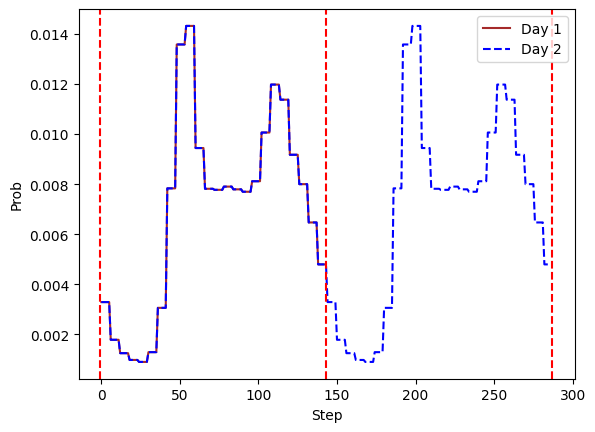

,Unnamed: 0,hour,prob,step_prob,step
0,0,0,0.019735,0.003289,0
1,0,0,0.019735,0.003289,1
2,0,0,0.019735,0.003289,2
3,0,0,0.019735,0.003289,3
4,0,0,0.019735,0.003289,4
...,...,...,...,...,...
283,23,23,0.028770,0.004795,283
284,23,23,0.028770,0.004795,284
285,23,23,0.028770,0.004795,285
286,23,23,0.028770,0.004795,286


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(f'input/travel_hour_prob.csv')
# 假设您已经有了一个名为 df 的 DataFrame，包含 "hour" 和 "prob" 列，
# 其中 "hour" 是小时（0-23），"prob" 是对应的概率值
step_per_hour = int(60 / min_per_step)
step_cnt = int(1440 / min_per_step)

# 创建一个图形和一个坐标轴
fig, ax = plt.subplots()
df_expanded = pd.DataFrame()
# 预定义的颜色名称列表
colors = ['brown', 'blue', 'red', 'green', 'orange', 'purple', 'pink']
# 预定义的线条样式列表
line_styles = ['-', '--', '-.', ':']
for i in range(days):
    # 将概率分布进行归一化
    total_prob = df['prob'].sum()
    df['prob'] = df['prob'] / total_prob

    # 计算每个步骤的概率值
    df['step_prob'] = df['prob'] / step_per_hour

    # 重复概率值以填充144个步骤
    tmp = df.loc[np.repeat(df.index.values, step_per_hour)].reset_index(drop=True)

    # 调整索引以接着往下加
    tmp.index = np.arange(len(df_expanded), len(df_expanded) + len(tmp))

    df_expanded = pd.concat([df_expanded, tmp])
    # 使用预定义颜色名称列表中的颜色
    color = colors[i % len(colors)]  # 根据索引取模获取颜色
    # 使用预定义线条样式列表中的线条样式
    line_style = line_styles[i % len(line_styles)]  # 根据索引取模获取线条样式

    # 绘制概率分布曲线，并指定颜色、线条样式和标签
    ax.plot(df_expanded['step_prob'], color=color, linestyle=line_style, label=f'Day {i + 1}')  # 根据 day 设置颜色、线条样式和标签
# 设置坐标轴标签
ax.set_xlabel('Step')
ax.set_ylabel('Prob')

# 指定需要画竖线的位置
vertical_lines = [step_cnt * i - 1 for i in range(days + 1)]  # 替换为具体的位置值
# 在指定位置画竖线
for line in vertical_lines:
    ax.axvline(x=line, color='red', linestyle='--')
# 添加图例
ax.legend()
# 显示图形
plt.show()

df_expanded2 = pd.DataFrame({'step': range(step_cnt * days)})
df_expanded['step'] = df_expanded2
df_expanded.to_csv(f'{input}/prob.csv')
df_expanded

## 生成trip_id

In [11]:
import random

agent_data = pd.read_csv(f'{input}/od_count.csv')
prob = pd.read_csv(f'{input}/prob.csv')

# 生成 trip_id 列
trip_ids = []
dates = []
for _, row in agent_data.iterrows():
    o = row['O']
    d = row['D']
    count = row['count']
    date = row['date']

    for i in range(1, count + 1):
        trip_id = f"{i}-{o}-{d}"
        trip_ids.append(trip_id)
        dates.append(date)

agent_data = pd.DataFrame(trip_ids, columns=['trip_id'])
agent_data['O'] = agent_data['trip_id'].apply(lambda x: int(x.split('-')[1]))
agent_data['D'] = agent_data['trip_id'].apply(lambda x: int(x.split('-')[2]))
agent_data['date'] = dates
start_steps = random.choices(prob["step"], prob["step_prob"], k=agent_data.shape[0])
agent_data['start_step'] = start_steps
agent_data['id'], _ = pd.factorize(agent_data['trip_id'])

# 重新排列列的顺序
agent_data = agent_data[['trip_id', 'id', 'O', 'D', 'date', 'start_step']]

agent_data.to_csv(f'{input}/od_to_trip_id.csv')

agent_data

,trip_id,id,O,D,date,start_step
0,1-6-924,0,6,924,2023-09-03,52
1,1-27-81,1,27,81,2023-09-03,8
2,1-28-996,2,28,996,2023-09-03,11
3,1-32-72,3,32,72,2023-09-03,68
4,1-32-93,4,32,93,2023-09-03,238
...,...,...,...,...,...,...
387,1-1027-989,368,1027,989,2023-09-04,59
388,1-1039-847,369,1039,847,2023-09-04,241
389,1-1040-6,370,1040,6,2023-09-04,112
390,1-1040-906,371,1040,906,2023-09-04,103


# 代理类

In [13]:
import threading
import math
from datetime import datetime
import random
import pandas as pd
import psutil

# 记录开始时间
start_time = datetime.now()
print(f'start_time:{start_time}')
time_list = []
time_list.append(start_time)


class CarAgent(threading.Thread):

    def __init__(self, trip_id, o, d, edge_ids, cumsum_lengths, start_step, allstep,
                 energy_consumption_per_step,
                 charging_amount_per_step, speed, init_charge, find_station_dis, charging_threshold,
                 max_charging_threshold, battery, date):

        # 和初始化相关的参数
        super().__init__()
        self.trip_id = trip_id
        self.o = o
        self.d = d
        self.edge_ids = edge_ids,
        self.cumsum_lengths = cumsum_lengths,
        # self.if_stations = if_stations,
        # step
        self.allstep = allstep  # 该代理模拟的步数
        self.step = 0
        self.start_step = start_step  # 暂定为每个step代表15min
        # state
        self.energy_consumption_per_step = energy_consumption_per_step
        self.charging_amount_per_step = charging_amount_per_step
        self.date = date  # 日期
        self.charge = init_charge  # 初始电量,以后取一个正太分布
        self.speed = speed  # 每一个step能走多少距离 单位是km
        self.find_station_dis = find_station_dis  # 多近充电站可以直接去 单位m
        self.charging_threshold = charging_threshold  # 充电阈值，低于阈值开始进入寻找充电站的函数
        self.max_charging_threshold = max_charging_threshold  # 充电阈值，大于阈值离开充电站

        # other parameters
        self.current_node = o
        self.destination_node = d
        self.state = 1  # 1是行驶中，0是充电中
        self.current_edge_id = -1  # 当前所处的边ID
        self.edge_index = 0  # 记录当前行驶的边在边列表中的索引
        self.current_position_on_edge = 0  # 记录当前行驶边的累计长度
        self.current_sum_length = 0  # 记录当前行驶边长度
        # df
        self.battery = battery
        self.charging_prob = 0
        self.selected_rows = pd.DataFrame()
        self.car_df = self.create_car_dataframe()
        self.need_charge = 0
        columns = ['trip_id', 'step', 'current_charge', 'station_id', 'date', 'current_state']  # 列名列表
        self.car_charging_df = pd.DataFrame(columns=columns)

    # utils
    def charging_per_step(self, station_agent):
        # self.need_charge
        # if self.need_charge - self.charge

        if self.charge < 85 and self.state == 0 and self.need_charge >= 0:
            self.charge += charging_amount_per_step
            self.need_charge -= charging_amount_per_step
            station_agent.charging_demand += charging_amount_per_step
            if self.charge > 100:  # 减去多充的电
                station_agent.charging_demand -= self.charge - 100
                self.need_charge += self.charge - 100
                self.charge = 100
        else:
            self.state = 1

    def append_car_charging_df(self, station_id):
        output_data = {
            'trip_id': self.trip_id,
            'step': self.step,
            'start_step': self.start_step,
            'current_charge': self.charge,
            'current_state': self.state,
            'station_id': station_id,
            'date': self.date
        }
        return pd.DataFrame([output_data])

    def create_car_dataframe(self):
        if self.current_node == self.d:
            remain = 0
        else:
            remain = max(0, self.current_sum_length - self.current_position_on_edge)
        output_data = {
            'trip_id': self.trip_id,
            'step': self.step,
            'start_step': self.start_step,
            'current_charge': self.charge,
            'charging_prob': self.charging_prob,
            'current_edge_id': self.current_edge_id,
            'remaining_length': remain,
            'current_node': self.current_node,
            'current_state': self.state,
            'date': self.date
        }
        return pd.DataFrame([output_data])

    # 返回当前edge_id满足距离要求的station
    def find_nearby_charging_stations(self):
        return self.if_stations[self.edge_index]

    # 寻找最近的充电站
    def charge_at_nearest_station(self, nearby_charging_stations):
        nearest_charging_station = nearby_charging_stations.iloc[0]
        charge_node_id = nearest_charging_station['charge_node_id']
        charging_station = station_agents_dict[charge_node_id]

        # 强制充电
        if self.charge < 20 or self.charge < self.energy_consumption_per_step or charging_station.has_capacity():
            self.current_node = charge_node_id
            end_distance = self.cumsum_lengths[0][-1] - self.cumsum_lengths[0][self.edge_index]
            hourly_consumption = (2 / 7) * self.battery  # 每小时消耗的电量，单位：kWh
            self.need_charge = end_distance / 100 * hourly_consumption
            charging_station.station_run(self)

    # 判断是否充电
    def check_charging_station(self, mode):
        # 行驶中
        if self.state == 1:
            if self.current_node != self.d:
                # 如果有灵车
                if self.charge <= 0:  # cont. 结束这个模拟，并给出报错
                    self.charge = 0
                    # print(f"{self.trip_id}'s charge is null")

                nearby_charging_stations = self.find_nearby_charging_stations()
                if not nearby_charging_stations.empty:
                    # 在step内部开始充电
                    if mode == 1:
                        self.current_position_on_edge = 0  # 走到当前边的终点(也就是下一条边的起点)充电
                    else:
                        self.current_position_on_edge = self.current_sum_length

                    self.charge_at_nearest_station(nearby_charging_stations)
                    # else:  # 当前edge没有在find_dis距离内的充电站
                    #     print(f'{self.trip_id}在{self.current_edge_id}没找到充电站,当前电量是{self.charge}')
            else:
                # car_in_highway.pop(self.trip_id, None)
                cars_to_delete[self.trip_id] = car

    def move_to_next_node(self):
        if self.state == 1:  # and self.charge > 0:  # 行驶中;有bug，之前默认为汽车电量低会进入强制充电。当step过大，电量耗尽时汽车所在边可能没有充电站，此时进入灵车状态
            # 如果没行驶到终点
            if self.current_node != self.d:
                self.current_edge_id = self.edge_ids[0][self.edge_index]  # 更新当前所处的边ID
                self.current_position_on_edge += self.speed  # 更新当前边上的位置  有bug 汽车的距离应该不直接和step挂钩，而是和耗电多少挂钩
                self.charge = max(self.charge - self.energy_consumption_per_step, 0)  # 模拟行驶耗电量
                self.current_sum_length = self.cumsum_lengths[0][self.edge_index]
                # 如果当前边的位置 >= 路的总长度,如果没超过也得更新position
                if self.current_position_on_edge >= self.current_sum_length:
                    while self.current_position_on_edge >= self.current_sum_length and self.current_node != self.d:
                        # 已经行驶完当前边，切换到下一边
                        if self.edge_index < len(self.edge_ids[0]) - 1:
                            self.edge_index += 1
                            self.destination_node = self.edge_ids[0][self.edge_index]
                            self.current_edge_id = self.edge_ids[0][self.edge_index]  # 更新当前所处的边ID
                            self.current_sum_length = self.cumsum_lengths[0][self.edge_index]
                            self.current_position_on_edge = self.current_position_on_edge - self.cumsum_lengths[0][
                                self.edge_index - 1]  # 重置当前边上的位置
                            if self.charge < self.charging_threshold and random.random() < self.get_charging_probability():
                                self.check_charging_station(1)
                        else:  # 当前已经处于最后条边,并且剩余能行驶的距离大于最后一条边，那么视为到达终点
                            self.current_node = self.d
                            # car_in_highway.pop(self.trip_id, None)
                            cars_to_delete[self.trip_id] = car
                            self.car_df = pd.concat([self.car_df, self.create_car_dataframe()], ignore_index=True)
                            break

                # 如果没到目的地 判断是否需要充电
                if random.random() < self.get_charging_probability():
                    self.check_charging_station(2)
        else:  # 充电中
            if self.charge >= self.max_charging_threshold:
                self.state = 1
                # 对充电站的操作
                staion_agent = station_agents_dict[self.current_node]
                self.current_node = self.o
                staion_agent.current_queue.remove(self)
                self.car_charging_df = pd.concat(
                    [self.car_charging_df, self.append_car_charging_df(staion_agent.charge_node_id)],
                    ignore_index=True)
                # staion_agent.add_to_queue(self) #上一个step已经充满电了，这一个step刚开始，新加入的车应该从当前step开始充电了，
                # self.step += 1
                # 给station_df添加车辆
                staion_agent.append_to_stationDf()

            else:  # 继续充电
                station_agents_dict[self.current_node].station_run(self)

    def get_charging_probability(self):

        base_probability = math.exp(- self.charge / 30)
        if self.charge > 95:
            base_probability = 1 - self.charge / 100
        elif self.charge < 10:
            base_probability = 1 - self.charge / 100
        adjusted_probability = base_probability
        # if waiting_num > current_num:
        #     adjusted_probability = base_probability * 0.6
        return adjusted_probability

    def run(self):
        if self.current_node != self.d:
            # car_df 当前状态
            self.car_df = pd.concat([self.car_df, self.create_car_dataframe()], ignore_index=True)
            self.step += 1
            self.move_to_next_node()
        else:
            cars_to_delete[self.trip_id] = car


class ChargingStationAgent:
    def __init__(self, charge_node_id, max_capacity):
        self.charge_node_id = charge_node_id
        self.max_capacity = max_capacity
        self.remaining_capacity = max_capacity
        self.waiting_queue = []  # 等待队列
        self.current_queue = []  # 正在充电的队列
        self.charging_demand = 0
        self.all_car_num = 0
        self.station_df = pd.DataFrame()
        columns = ['trip_id', 'step', 'current_charge', 'station_id', 'date', 'current_state']  # 列名列表
        self.car_charging_df = pd.DataFrame(columns=columns)
        # utils

    def if_not_exit_in_queues(self, car_agent):
        return (car_agent not in self.current_queue) and (car_agent not in self.waiting_queue)

    def append_car_charging_df(self, car):
        output_data = {
            'trip_id': car.trip_id,
            'step': car.step,
            'start_step': car.start_step,
            'current_charge': car.charge,
            'current_state': car.state,
            'station_id': self.charge_node_id,
            'date': car.date
        }
        return pd.DataFrame([output_data])

    def append_to_stationDf(self):
        new_station_df = pd.DataFrame({
            'charge_node_id': self.charge_node_id,
            'step': now_step,
            'all_car_num': self.all_car_num,
            'charging_demand': self.charging_demand,
            'current_car': [[current_car.trip_id for current_car in self.current_queue]],
            'waiting_car': [[current_car.trip_id for current_car in self.waiting_queue]]
        })

        self.station_df = pd.concat([self.station_df, new_station_df], ignore_index=False)

    def has_capacity(self):
        return len(self.current_queue) < self.max_capacity

    def charge_cars(self, car_agent):
        if car_agent in self.current_queue:
            car_agent.charging_per_step(self)

    def add_to_queue(self, car_agent):
        if self.if_not_exit_in_queues(car_agent):
            if self.has_capacity():
                self.current_queue.append(car_agent)
                self.car_charging_df = pd.concat([self.car_charging_df, self.append_car_charging_df(car_agent)],
                                                 ignore_index=True)
                self.all_car_num += 1
            else:
                self.waiting_queue.append(car_agent)
                self.car_charging_df = pd.concat([self.car_charging_df, self.append_car_charging_df(car_agent)],
                                                 ignore_index=True)
            self.append_to_stationDf()

    def move_cars_from_waiting_to_current(self):
        while self.has_capacity() and len(self.waiting_queue) > 0:
            car_agent = self.waiting_queue.pop(0)
            self.append_to_stationDf()
            if car_agent not in self.current_queue:
                self.current_queue.append(car_agent)
                self.car_charging_df = pd.concat([self.car_charging_df, self.append_car_charging_df(car_agent)],
                                                 ignore_index=True)

                self.all_car_num += 1
                self.append_to_stationDf()

    def station_run(self, car_agent):
        car_agent.state = 0  #0代表非行驶状态
        self.add_to_queue(car_agent)
        # 如果在current队列中就给充电
        self.charge_cars(car_agent)
        # 如果有空余位置就把waiting队列pop 并加入到current队列
        self.move_cars_from_waiting_to_current()


# 读入数据
origin_od = pd.read_csv(f'{data}/od_dis_table.csv')
od_dis_table = pd.read_csv(f'{input}/new_od_dis.csv')
edge_to_charge = pd.read_csv(f'{data}/edge_to_charge.csv')
agent_data = pd.read_csv(f'{input}/od_to_trip_id.csv')

now_time = datetime.now()
time_list.append(now_time)
print(f"读入OD数据时间：{now_time:.2f}秒")

# 初始化所有的stations
station_ids = edge_to_charge.groupby('charge_node_id')['充电车位数'].first().reset_index()
station_agents = [
    ChargingStationAgent(row.charge_node_id, row['充电车位数'])
    for _, row in station_ids.iterrows()
]
station_agents_dict = {
    agent.charge_node_id: agent
    for agent in station_agents
}

# 初始化代理
# 车的设定是电池容量70kWh，百公里耗电20kWh，一辆车续航3.5h，350km左右;
# 充电速率快充，40kW，每小时可以充40kWh;

now_step = 0  # 每一个step 6min /到达关键节点
allstep = 10
init_charge = random.randint(90, 100)

cnt_step = (1440 // min_per_step) * days - 1  # 一天有多少个step,从0开始

charging_amount_per_step = 100 * (4 / 7) * (min_per_step / 60)  # 每小时充40kw（4/7）的电量
# charging_amount_per_step = 50 # 每小时充40kw（4/7）的电量
speed = 1000 * (min_per_step * 100) / 60  # 每个step行驶的距离
energy_consumption_per_step = speed * (2 / 7) / 1000  # 百公里耗电20kwh，也就是 2/7 的电量
find_dis = 1000  # 多近的距离可以直接去
charging_threshold = 99  # 多少电量开始寻找充电站
max_charging_threshold = 85

import pandas as pd

agents = []
car_in_highway = {}
all_agent_list_dict = [[] for _ in range(cnt_step + 1)]
# all_agent_list_dict = [[] for _ in range(cnt_step * 2 + 1)]
# 初始化
for _, row in agent_data.iterrows():
    trip_id = row['trip_id']
    o = row['O']
    d = row['D']
    date = row['date']
    start_step = row['start_step']

    row = od_dis_table[(od_dis_table['station_id_x'] == o) & (od_dis_table['station_id_y'] == d)]

    agent = CarAgent(
        trip_id=trip_id,
        o=o,
        d=d,
        edge_ids=row['edge_id'].apply(eval).tolist()[0],
        cumsum_lengths=row['cumsumlength'].apply(eval).tolist()[0],
        # if_stations=row['if_stations'],
        init_charge=init_charge,
        allstep=allstep,  # 模拟步数,没启用
        energy_consumption_per_step=energy_consumption_per_step,
        start_step=start_step,
        charging_amount_per_step=charging_amount_per_step,
        date=date,
        speed=speed,
        find_station_dis=find_dis,
        charging_threshold=charging_threshold,
        max_charging_threshold=max_charging_threshold,
        battery=70,
    )

    agents.append(agent)
    all_agent_list_dict[start_step].append(agent)

now_time = datetime.now()
time_list.append(now_time)
print(f"初始化时间：{now_time:.2f}秒")

car_ids = list(car_in_highway.keys())  # 创建一个字典键的副本


# 定义一个函数用于监测资源使用情况
def measure_resource_usage():
    cpu_percent = psutil.cpu_percent(interval=None)
    memory_percent = psutil.virtual_memory().percent
    print("CPU Usage: {:.2f}%".format(cpu_percent))
    print("Memory Usage: {:.2f}%".format(memory_percent))


def run_car(car, thread_number):
    car.run()
    print(f"Thread {thread_number} is over")


# 代理运行
for step in range(cnt_step - 1):
    # for step in range(cnt_step * 2 - 1):

    now_step = step
    print(f"now_step:{now_step}")
    # 监测资源使用情况
    measure_resource_usage()
    agent_list = all_agent_list_dict[step]  # 获取当前时刻（step）的代理列表
    if agent_list:  # 如果当前step有agent
        for agent in agent_list:
            # agent.run()
            car_in_highway[agent.trip_id] = agent
    cars_to_delete = {}
    threads = []

    for i, (trip_id, car) in enumerate(car_in_highway.items()):
        thread = threading.Thread(target=run_car, args=(car, i + 1))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    # 创建一个临时的字典用于存储要删除的元素
    # 删除临时字典中的元素
    for trip_id in cars_to_delete:
        car_in_highway.pop(trip_id, None)

now_time = datetime.now()
time_list.append(now_time)
print(f"完成运行时间：{now_time:.2f}秒")

all_car_df = pd.concat([agent.car_df for agent in agents], ignore_index=False)
all_car_df = all_car_df.set_index('step')
all_car_df['id'], _ = pd.factorize(all_car_df['trip_id'])
all_car_df.to_csv(f'{output}/cars_step_day.csv')

all_car_df = pd.concat([agent.car_charging_df for agent in agents], ignore_index=False)
car_charging_df = pd.concat([agent.car_charging_df for agent in agents], ignore_index=False)
car_charging_df = pd.concat([station.car_charging_df for station in station_agents], ignore_index=False)
car_charging_df.to_csv(f'{output}/car_charging_df.csv')

all_station_df = pd.concat([station.station_df for station in station_agents], ignore_index=False)

if not all_station_df.empty:
    # Calculate hours and minutes
    all_station_df['hour'] = (all_station_df['step'] * min_per_step) // 60
    all_station_df['minute'] = (all_station_df['step'] * min_per_step) % 60

    all_station_df['day'] = all_station_df['hour'] // 24
    # Calculate the remaining hours after accounting for the rolled-over days
    all_station_df['remaining_hour'] = all_station_df['hour'] % 24

    # Calculate the base date
    base_date = pd.Timestamp('2023-09-03')

    # Calculate the current date based on the number of days and adjusted timedelta
    all_station_df['time'] = base_date + all_station_df['day'].apply(lambda x: timedelta(days=x)) + all_station_df[
        'remaining_hour'].apply(lambda x: timedelta(hours=x // 1))

    # Drop the 'hour', 'minute', and 'date' columns
    all_station_df = all_station_df.drop(["hour", "minute", "remaining_hour"], axis=1)

    all_station_df.to_csv(f'{output}/station.csv')
else:
    print('整个ABM没有充电需求')

time_df = pd.DataFrame({'time': time_list})
time_df.to_csv(f'{output}/{min_per_step}step time.csv')

start_time:2023-10-26 23:39:59.941003
读入OD数据时间：.2f秒


IndexError: list index out of range

# 输出数据处理

## 1 汽车 step to time

In [ ]:
from datetime import datetime, timedelta
import geopandas as gpd
import pandas as pd

edge = gpd.read_file(rf'{data}/广东省高速公路_简化_边.json')
edge.crs

all_car = pd.read_csv(f'{output}/cars_step_day.csv')

all_car['true_step'] = all_car['step'] + all_car['start_step']

all_car2 = all_car[['trip_id', 'current_charge', 'current_edge_id', 'remaining_length', 'true_step', 'date']]

step_per_day = 1440 // min_per_step - 1  # 一天的 step 数量  0-23


def calculate_time(row):
    days = (row['true_step']) // step_per_day  # 计算跨越的天数
    minutes = (row['true_step'] % step_per_day) * min_per_step  # 计算剩余分钟数
    base_date = datetime.strptime(row['date'], '%Y-%m-%d')  # 基准日期（转换为日期对象）
    base_date = datetime(base_date.year, base_date.month, base_date.day)
    time = base_date + timedelta(days=days, minutes=minutes)  # 计算最终的日期和时间
    return time


all_car2['time'] = all_car2.apply(calculate_time, axis=1)
all_car2 = all_car2.reset_index(drop=True)

# all_car2
all_car2 = all_car2.rename(columns={'current_edge_id': 'edge_id'})

# 插值经纬度
data1 = pd.merge(all_car2, edge, on='edge_id')
data1['ratio'] = 1 - data1['remaining_length'] / data1['length']
data1['p'] = data1.apply(lambda row: row['geometry'].interpolate(row['geometry'].length * row['ratio']), axis=1)
data1['lon'] = data1['p'].apply(lambda r: r.x)
data1['lat'] = data1['p'].apply(lambda r: r.y)
# 生成时间
data2 = data1[
    ['trip_id', 'edge_id', 'current_charge', 'remaining_length', 'length', 'ratio', 'p', 'true_step', 'time', 'lon',
     'lat']]

data2['id'], _ = pd.factorize(data2['trip_id'])

sorted_df = data2.sort_values(by=["id", "time"])
sorted_df = sorted_df[['id', 'trip_id', 'edge_id', 'current_charge', 'lon', 'lat', 'time']]
sorted_df['100-soc'] = 100 - sorted_df['current_charge']

# 保存
sorted_df.to_csv(f'{output}/car_vis.csv')
sorted_df

## 2 station_demand :time and lon lat

In [ ]:
import pandas as pd
import ast
import geopandas as gpd
import time

stations_step_day = pd.read_csv(f'{output}/station.csv')
edge_to_charge = pd.read_csv(f'{data}/edge_to_charge.csv')
# 计算每一时刻充电站的车辆数
stations_step_day['current_car'] = stations_step_day['current_car'].apply(lambda x: ast.literal_eval(x))
stations_step_day['waiting_car'] = stations_step_day['waiting_car'].apply(lambda x: ast.literal_eval(x))
stations_step_day['current_car_count'] = stations_step_day['current_car'].apply(lambda x: len(x))
stations_step_day['waiting_car_count'] = stations_step_day['waiting_car'].apply(lambda x: len(x))

# 补全至全天时间段
charge_node_id = stations_step_day[['charge_node_id']].drop_duplicates()
charge_node_id['flag'] = 1
steps = pd.DataFrame(range(stations_step_day['step'].max()), columns=['step'])
steps['flag'] = 1
charge_node_id = pd.merge(charge_node_id, steps, on='flag').drop('flag', axis=1)

stations_step_day = pd.merge(charge_node_id, stations_step_day, on=['charge_node_id', 'step'], how='left').groupby(
    'charge_node_id').apply(lambda df: df.ffill().fillna(0))

# 对应充电站位置
stations_node = gpd.read_file(f'{data}/广东省高速公路_简化_节点.json')
stations_step_day = pd.merge(stations_step_day, stations_node[['id', 'lon', 'lat']], left_on='charge_node_id',
                             right_on='id')
# 换算到时间
step_length = f'{min_per_step} minutes'
stations_step_day['time'] = stations_step_day['step'] * pd.Timedelta(step_length) + pd.Timestamp('2023-09-03 00:00:00')
stations_step_day['time'] = stations_step_day['time'].astype(str)
stations_step_day[
    ['charge_node_id', 'lon', 'lat', 'time', 'charging_demand', 'current_car_count', 'waiting_car_count']].to_csv(
    f'{output}/station_vis.csv', index=False)

now_time = datetime.now()
time_list.append(now_time)
print(f"完成ABM+数据保存所需时间：{now_time:.2f}秒")

for times in time_list:
    hours = times.seconds // 3600
    minutes = (times.seconds % 3600) // 60
    seconds = times.seconds % 60
    print(f"时间差: {hours}小时 {minutes}分钟 {seconds}秒")

### 订单数据

In [ ]:
## 计算出的充电需求偏少
car_output = pd.read_csv(f'{output}/cars_step_day.csv')
car_output['id'], _ = pd.factorize(car_output['trip_id'])
car_output.set_index('id', inplace=True)
result = car_output[car_output['current_state'] == 0].groupby('id').apply(lambda x: x)
first_rows = result.groupby('id').first()
last_rows = result.groupby('id').last()
combined_rows = pd.concat([first_rows, last_rows])
combined_rows['step'] = combined_rows['start_step'] + combined_rows['step']
step_length = f'{min_per_step} minutes'
combined_rows['time'] = combined_rows['step'] * pd.Timedelta(step_length) + pd.Timestamp('2023-09-03 00:00:00')
combined_rows['time'] = combined_rows['time'].astype(str)
order = combined_rows[['trip_id', 'time', 'current_charge', 'current_node']]
order.to_csv(f'{output}/order.csv')
order

### 路段数据

## 3 station_demand可视化 step换算

In [ ]:
import pandas as pd

station_output = pd.read_csv(f'{output}/station.csv')
step_num = 1440 // min_per_step - 1  # 一天有多少个step,从0开始
complete_steps = range(step_num + 1)  #

## 计算差值
# 按照 "step" 列进行分组，并计算每个分组中的最大车辆数和需求
aggregated_df = station_output.groupby(["step", "charge_node_id"]).agg({"all_car_num": "max", "charging_demand": "max"})
# 按照 "charge_node_id" 进行分组，并计算相邻行的差值
aggregated_df['num_diff'] = aggregated_df.groupby('charge_node_id')['all_car_num'].diff()
aggregated_df['demand_diff'] = aggregated_df.groupby('charge_node_id')['charging_demand'].diff()
aggregated_df = aggregated_df.fillna(0)
summed_df = aggregated_df.groupby('step').agg({'num_diff': 'sum', 'demand_diff': 'sum'}).reset_index()
# 差值
summed_df

# 空的所有step和上述差值做merge
allstepdf = pd.DataFrame({'step': complete_steps})
allstepdf['num_diff'] = 0
allstepdf['demand_diff'] = 0
stations_demand = pd.merge(allstepdf, summed_df, on='step', how='left')
# 使用 df2 中的值替换 df1 中的对应行
stations_demand['num_diff_y'].fillna(0, inplace=True)
stations_demand['demand_diff_y'].fillna(0, inplace=True)
# 删除多余的列
stations_demand.drop(['num_diff_x', 'demand_diff_x'], axis=1, inplace=True)
stations_demand.rename(columns={'num_diff_y': 'all_car_num', 'demand_diff_y': 'charging_demand'}, inplace=True)
# 计算小时数和分钟数
stations_demand['hour'] = stations_demand['step'] // (60 / min_per_step)
stations_demand['minute'] = (stations_demand['step'] % (60 / min_per_step)) * min_per_step
stations_demand

## 4 根据24小时可视化

In [ ]:
stations_demand_time = stations_demand.groupby("hour").agg(
    {"all_car_num": "sum", "charging_demand": "sum"}).reset_index()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经有了一个名为 df 的 DataFrame，包含 "step"、"demand" 和 "num" 列

# 创建一个图形和一个坐标轴
fig, ax1 = plt.subplots()

# 插值方法
interp_method = 'cubic'  # 可以尝试不同的插值方法，如 'linear', 'quadratic', 'cubic'

# 绘制 "demand" 曲线
x = stations_demand_time['hour']
y_demand = stations_demand_time['charging_demand']
x_new = np.linspace(x.min(), x.max(), 300)  # 创建新的平滑的 x 值
y_demand_smooth = np.interp(x_new, x, y_demand)  # 进行插值计算
ax1.plot(x_new, y_demand_smooth, color='blue', label='Demand')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建第二个坐标轴，并绘制 "num" 曲线
ax2 = ax1.twinx()
y_num = stations_demand_time['all_car_num']
y_num_smooth = np.interp(x_new, x, y_num)  # 进行插值计算
ax2.plot(x_new, y_num_smooth, color='red', label='Num')
ax2.set_ylabel('Num', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 添加图例
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# 调整布局，以便 "num" 的刻度显示在图的右边
fig.tight_layout()

plt.savefig(f'{output}/demands_{step_num}step_24h.png')

# 显示图形
plt.show()

## 5 根据step可视化

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设您已经有了一个名为 df 的 DataFrame，包含 "step"、"demand" 和 "num" 列

# 创建一个图形和一个坐标轴
fig, ax1 = plt.subplots()

# 插值方法
# interp_method = 'cubic'  # 可以尝试不同的插值方法，如 'linear', 'quadratic', 'cubic'
interp_method = 'quadratic'  # 可以尝试不同的插值方法，如 'linear', 'quadratic', 'cubic'

# 绘制 "demand" 曲线
x = stations_demand['step']
y_demand = stations_demand['charging_demand']
x_new = np.linspace(x.min(), x.max(), 300)  # 创建新的平滑的 x 值
y_demand_smooth = np.interp(x_new, x, y_demand)  # 进行插值计算
ax1.plot(x_new, y_demand_smooth, color='blue', label='Demand')
ax1.set_xlabel('Step')
ax1.set_ylabel('Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建第二个坐标轴，并绘制 "num" 曲线
ax2 = ax1.twinx()
y_num = stations_demand['all_car_num']
y_num_smooth = np.interp(x_new, x, y_num)  # 进行插值计算
ax2.plot(x_new, y_num_smooth, color='red', label='Num')
ax2.set_ylabel('Num', color='red')
# ax2.set_ylim([0, 20])  # 设置纵轴刻度范围
ax2.tick_params(axis='y', labelcolor='red')

# 添加图例
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# 调整布局，以便 "num" 的刻度显示在图的右边
fig.tight_layout()

plt.savefig(f'{output}/qu_demands_{step_num + 1}step.png')

# 显示图形
plt.show()